In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('employee_data.csv')
print(df.shape)

#Dataset link: https://www.kaggle.com/datasets/marikastewart/employee-turnover
#This is data collected from the HR department of a anonymous company (for privacy reasons).
#This data was collected in hopes of finding the cause of a high turnover in the company.
#The data is from 10,000 employees collected from 2016-2020 using exit interviews, preformance reviews, etc



#Main Question: what departments would provide the healthiest work conditions?
#    1.) What departments averages the best salaries? 
#    2.) What department was most satisfying to work in? 
#    3.) What department is most likely to reward your work?

(9540, 10)


In [3]:
#--=Missing Data=--#
missingdata = df.isnull().sum()
print(missingdata)
print(df.shape)

#--=N/A Data=--#
df.dropna(inplace= True)
print(df.shape)
print()

#--=Duplicate Data=--#
df.drop_duplicates(subset = ['review'], keep = 'first')
df.drop_duplicates(subset = ['satisfaction'], keep = 'first')
df.drop_duplicates(subset = ['avg_hrs_month'], keep = 'first')
print(df.shape)

#--=Data Types=--#
df.dtypes

#--=Categorical Values=--#
df['salary'] = df['salary'].str.lower()
df['left'] = df['left'].str.lower()

#--=Outliers=--#
mean1 = np.mean(df['avg_hrs_month']) 
mean2 = np.mean(df['satisfaction'])
mean3 = np.mean(df['review'])
thresh1 = 3.5
thresh2 = 3
thresh3 = 3.1
outlierC = 0
    # Hours #
    
sd1 = np.std(df['avg_hrs_month'])
for avg in df['avg_hrs_month']: 
    z = (avg-mean1)/sd1 # z-score calc
    if abs(z) > thresh1:  # if its an outliers
        
        # delete special char in retrieved index num #
        avgindex = df[df['avg_hrs_month']==avg].index.values
        avgindexstr = str(avgindex)
        avgindexstr="".join(c for c in avgindexstr if c.isdecimal())
        avgindex = int(avgindexstr)
        # delete the outlier based on index
        outlierC =outlierC+1
        df.drop([df.index[avgindex]], inplace = True)

    # satisfaction #
sd2 = np.std(df['satisfaction'])
for sat in df['satisfaction']: 
    z2 = (sat-mean2)/sd2 # z-score calc
    if abs(z2) > thresh2:  # if its an outliers
        # delete special char in retrieved index num #
        satindex = df[df['satisfaction']==sat].index.values
        satindexstr = str(satindex)
        satindexstr="".join(c for c in satindexstr if c.isdecimal())
        satindex = int(satindexstr)
        # delete the outlier based on index
        outlierC =outlierC+1
        df.drop([df.index[satindex]], inplace = True)
        
    # review #
sd3 = np.std(df['review'])
for rev in df['review']: 
    z3 = (rev-mean3)/sd3 # z-score calc
    if abs(z3) > thresh3:  # if its an outliers
        # delete special char in retrieved index num #
        revind = df[df['review']==rev].index.values
        revindstr = str(revind)
        revindstr="".join(c for c in revindstr if c.isdecimal())
        revindex = int(revindstr)
         # delete the outlier based on index
        outlierC =outlierC+1
        df.drop([df.index[revindex]], inplace = True)
        

print(outlierC, 'Outliers deleted')
df.shape




department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64
(9540, 10)
(9540, 10)

(9540, 10)
22 Outliers deleted


(9518, 10)

C:\Users\14704\AppData\Local\Temp\ipykernel_10140\3861648200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highSal['salary'].replace({'high':1},inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

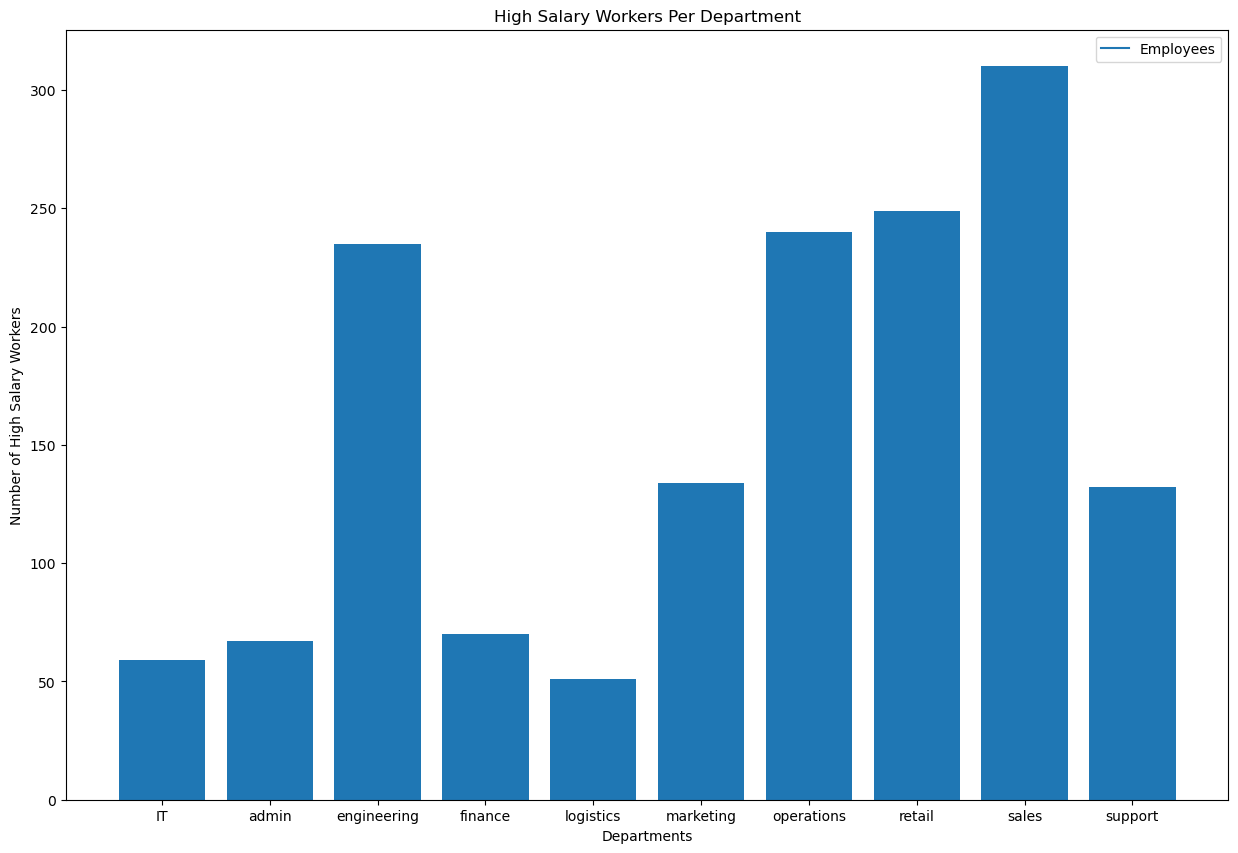

In [4]:
#What departments has the most high paying positions?#

#-A-#
df2 = df.copy()
highSal = df2[df2['salary'] == 'high']
highSal['salary'].replace({'high':1},inplace=True)
pv1 = pd.pivot_table(highSal, values='salary', index='department', columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
dfbar = pv1.reset_index()

#-B-#
fig, ax = plt.subplots(figsize=(15, 10))
x = dfbar.iloc[: ,0]
y = dfbar.iloc[: ,1]
plt.bar(x,y)
plt.yticks(np.arange(0, 400, 50))
plt.xlabel('Departments')
plt.ylabel('Number of High Salary Workers')
plt.title('High Salary Workers Per Department')
ax.plot([0], label='Employees')
ax.legend()
plt.show

#-C-#

#This graph uses the Y values as the number of employees with salaries described as high paying. 
#The X value is used to divide the number of high paying salaries into departments. 
#With this data the graph shows that the department with the most high Salary employees is the sales department



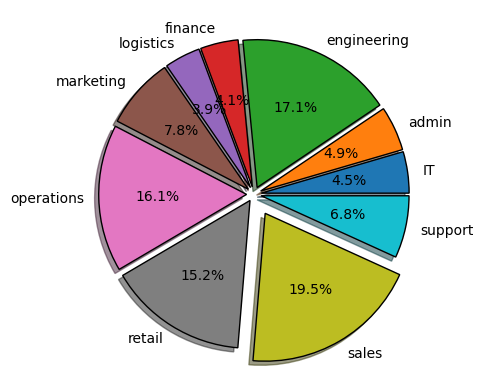

In [5]:
# What departments have the most productive and satisfied workers? #

df3 = df.copy()

#-A-#

satisfied_workers= df3[df3['satisfaction'] >=0.70]
pv2 = pd.pivot_table(satisfied_workers, values='satisfaction', index='department', columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
dfPie = pv2.reset_index()
dfPie.rename(columns={"satisfaction": "satisfaction_sum"}, inplace=True)


#-B-#

explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.15,0.05]
wedgeprops ={'edgecolor':'black'}
plt.pie(dfPie.iloc[:,1], labels=dfPie.iloc[:,0], explode= explode ,wedgeprops=wedgeprops, autopct="%.1f%%", shadow=True)
plt.show()


#-C-#

#This pie chart uses employees with satisfaction >=.7, and creates the sum for satisfaction within the company. 
#The pie chart then determines what department holds the largest percentage of employees who are satisfied by more than 0.69. 
#From this data it is clear that the department with the most amount of satisfied employees is sales.


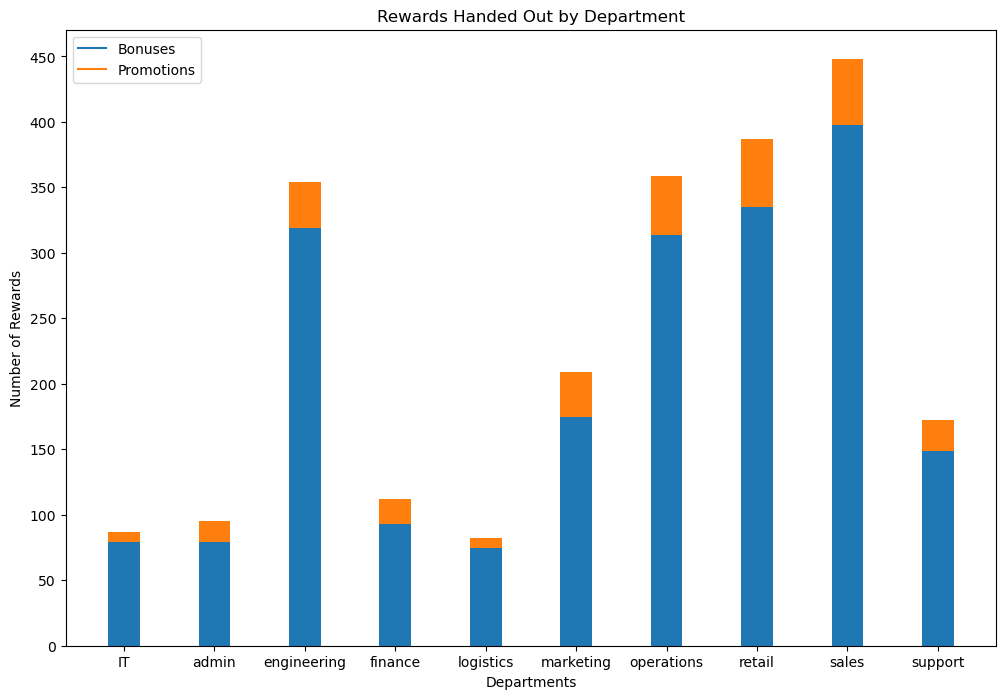

In [6]:
#What department is most likely to reward your work?
df4 = df.copy()

#-A-#
promoted_workers= df4[df4['promoted'] >= 1]
pv3 = pd.pivot_table(promoted_workers, values='promoted', index='department', columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
dfpv3 = pv3.reset_index()
bonuses= df4[df4['bonus'] == 1]
pv4 = pd.pivot_table(bonuses, values='bonus', index='department', columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
dfpv4 = pv4.reset_index()
promotedColumn = dfpv3['promoted']
dfstackbar = dfpv4.join(promotedColumn)
dfstackbar.rename(columns={"promoted": "promotins"}, inplace=True)
dfstackbar.rename(columns={"bonus": "bonuses"}, inplace=True)


#-B-#
fig, ax = plt.subplots(figsize=(12, 8))
x = dfstackbar.iloc[:,0]
plt.xlabel('Departments')
plt.ylabel('Number of Rewards')
plt.title('Rewards Handed Out by Department')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x_axis = np.arange(10)
width = 0.35
plt.yticks(np.arange(0, 500, 50))
plt.bar(x_axis, dfstackbar.iloc[:, 1], width = width) 
plt.bar(x_axis, dfstackbar.iloc[:, 2], width = width,  bottom = dfstackbar.iloc[:, 1])  
ax.plot([0], label='Bonuses')
ax.plot([0], label='Promotions')
ax.legend()
plt.xticks(x_axis, x)
plt.show()


#-C-#

#This stacked bar graph displays the number of employees given a reward. 
#It takes the number of employees given a promotion and the number of employees given a bonus and adds to to one of the 2 stacked bars. 
#The data collected on the graph shows that the department giving the most rewards to employees is sales


In [ ]:
#Summary#

#To summarize, the data in this project all points to the conclusion that the best department to work in is likely the sales department. 
#While I was able to find this based on the data in the table, there are some more precise things that weren’t included. 
#Things like the value of the number for things like satisfaction, the exact number of bonuses and promotions given out to a individual, or the exact span of time when these events occurred. 
#Something that needs more exploration is the size comparisons of each department. While Sales is likely the healthiest department to work in, this isn’t considering that Sales has one of the biggest data pools to pull from.
#Regardless, I am confident the data in the graphs does reflect some of the conditions in each of the departments.